# In Vino Veritas - A wine quality prediction project

## Project Overview
### Goals
The goal with this project is to create a machine learning model to predict the quality of a wine based on it's physicochemical properties. Also it will be to determine key drivers in the wine quality.
This Dataset was acquired through UCI's Machine Learning Repository and can be found [here](https://archive-beta.ics.uci.edu/ml/datasets/186)



### Findings


### Conclusion

### Re Creation

If you wish to recreate this project download the csv files for [red wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) and [white wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv) and save them to your repo. More information about this data can be found [here] <---- Insert link here

In [1]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# set plot defaults
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.titlesize'] = 15

sns.set_style('darkgrid')
# create module for this to hide color paalette and such

# import modeling tools
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

# import custom modules
import prepare as p
import explore as ex
import model as m

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_palette = ['#310c2d', '#672547', '#9e5f77', '#ddb49d', '#a96f55', '#929724']
wine_palette2 = ['#8d4271', '#310c2d', '#7c0000', '#8e314a', '#b15b58', '#c4a8ad', '#c1937d','#f2e9da']
wine_contrast = ['#672547', '#929724','#7c0000', '#b15b58', '#f2e9da' ]
wine_diverging = ['#8d4271', '#f2e9da', '#98C855' ]

sns.set_palette(wine_contrast)
sns.color_palette(wine_diverging)

[(0.5529411764705883, 0.25882352941176473, 0.44313725490196076),
 (0.9490196078431372, 0.9137254901960784, 0.8549019607843137),
 (0.596078431372549, 0.7843137254901961, 0.3333333333333333)]

In [3]:
# import data from csv
# delimeter is semi colons not commas
red_wines = pd.read_csv('winequality-red.csv', delimiter=';')
white_wines = pd.read_csv('winequality-white.csv', delimiter=';')

In [4]:
# look at red wine df
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#1599 entries
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# look at white wine df
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# 4898 entries
white_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Takeaways Data Acquisition
- Looks like there are no nulls in the dataset (yay!)
- Both have the same columns and column names
- All types floats or ints

**ToDo**
- concat tables togeher to have one long list
- create column to denote that wine is red or white (is_white boolian)

In [8]:
# add feature is_white
# put in prep function

def white_or_red(white_df, red_df):
    '''
    This function takes in the red wine dataframe and the white wine dataframe
    Adds a column to each called 'is_white'
    Assigns 1 (true) to all rows in the white_df
    and 0 to all rows in the red_df
    returns both dataframes
    '''
    white_df['is_white'] = 1
    red_df['is_white'] = 0
    
    return white_df, red_df

In [9]:
white_df, red_df = white_or_red(white_wines, red_wines)

In [10]:
# concat tables
# put in Prepare Function
def join_red_and_white(white_df, red_df):
    '''
    This function takes in the white df and the red df
    Concats them together
    Returns the full df
    '''
    
    full_df = pd.concat([red_df, white_df])

    return full_df

In [11]:
# use function to get full dataframe
df = join_red_and_white(white_df, red_df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  is_white              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [13]:
df.shape

(6497, 13)

In [14]:
# need to rename columns so easier to type
new_names = [col.replace(' ', '_') for col in list(df)]
new_names

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'is_white']

In [15]:
df.columns = new_names

In [16]:
def rename_columns(df):
    '''
    This function takes in a dataframe
    Replaces all ' ' (spaces) with '_'
    Returns the dataframe with the new names as col names
    '''
    # use list comp to replace with _
    # assign to columns of df
    df.columns = [col.replace(' ', '_') for col in list(df)]
    
    return df

In [17]:
# use function to rename columns
df = rename_columns(df)

### Takeaways
- Now have dataframe with 6497 rows and 13 columns

<hr style="border-top: 10px groove #7c0000; margin-top: 1px; margin-bottom: 1px"></hr>

## Explore
- Before performing Train Validate Test split, I'll do some Univariate Exploration to see distribution of variables 
- Then we'll split and continue to explore, looking for relationships between the data

In [18]:
def explore_univariate(df, figsize = (18,3)):
    '''
    This function is for exploring. Takes in a dataframe with variables you would like to see the box plot of.
    Input the dataframe (either fully, or using .drop) with ONLY the columns you want to see plotted.
    Optional arguement figsize. Default it's small.    
    '''

    for col in list(df):
        plt.figure(figsize=figsize)
        plt.subplot(121)
        sns.boxplot(x = col, data = df)
        plt.title(f'Box Plot of {col}')

        plt.subplot(122)
        sns.histplot(data = df, x = col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

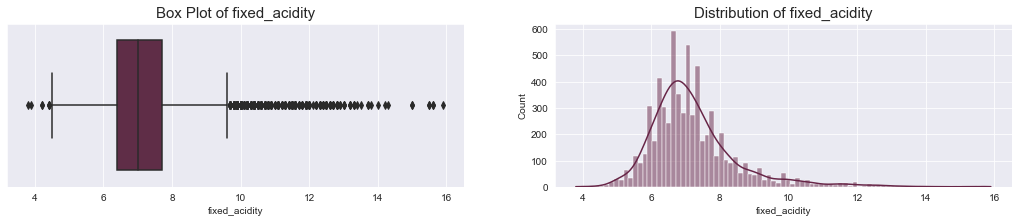

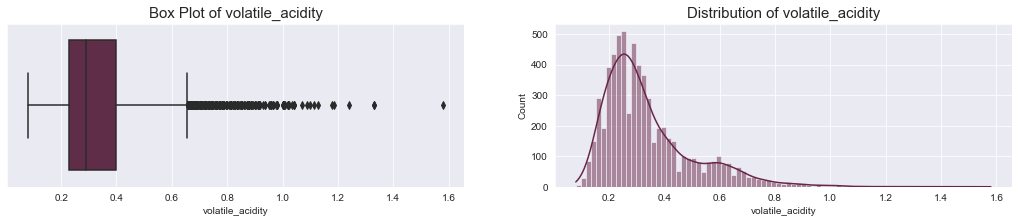

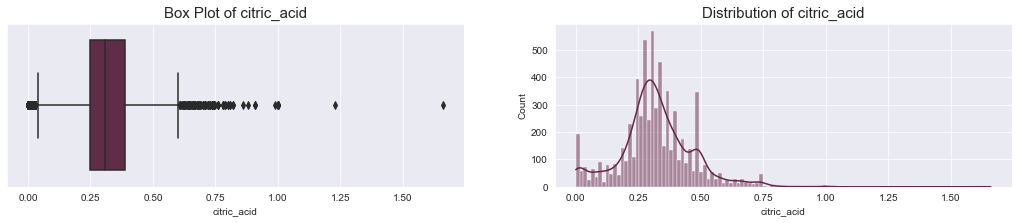

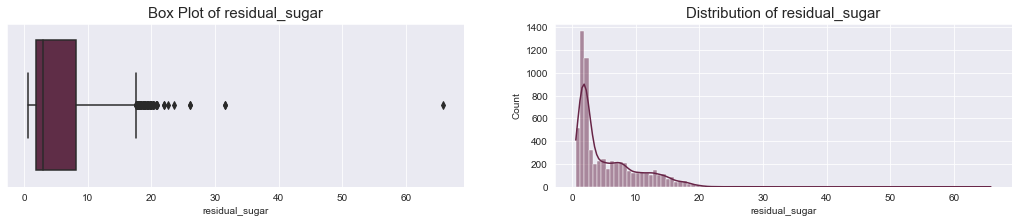

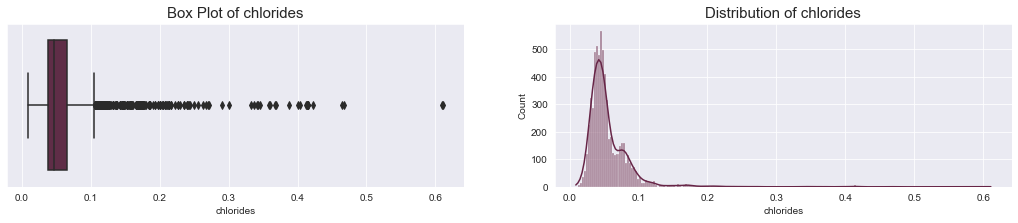

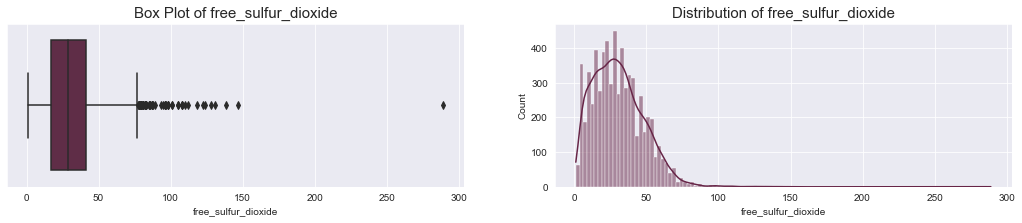

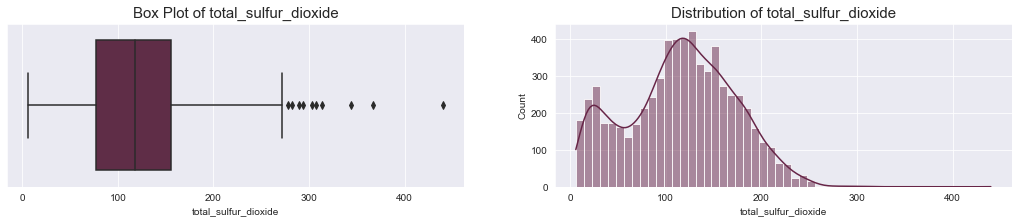

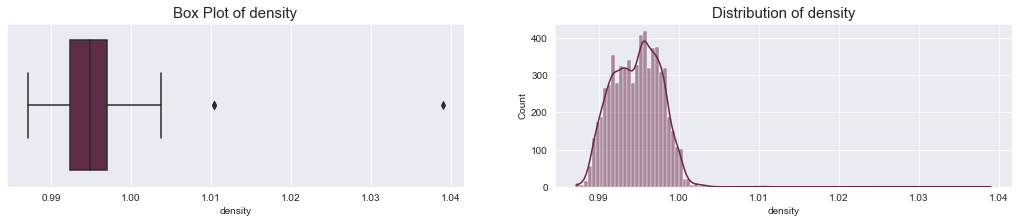

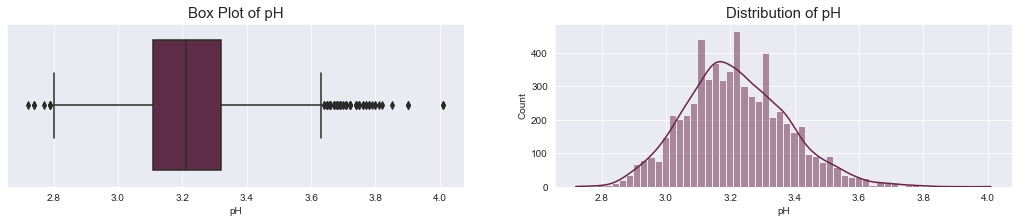

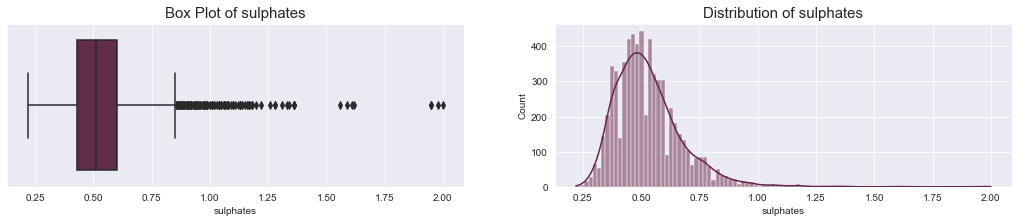

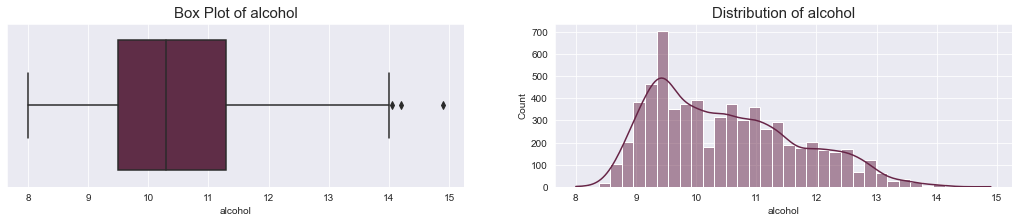

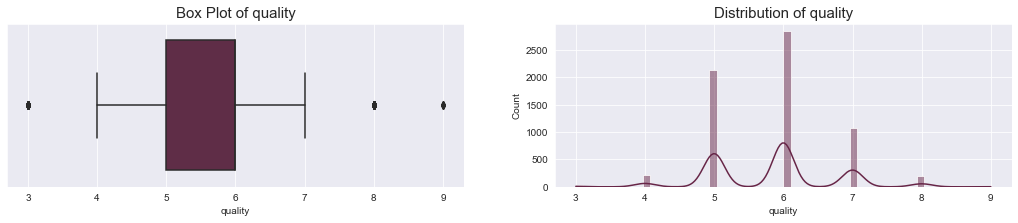

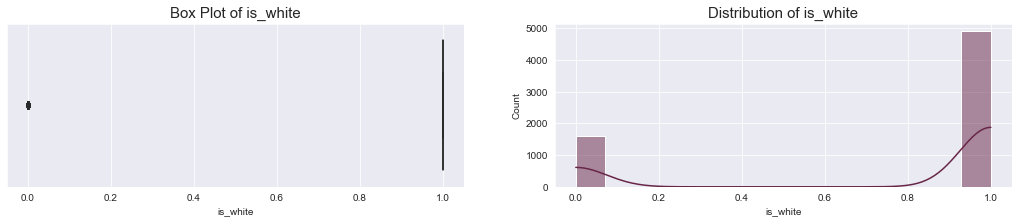

In [19]:
explore_univariate(df)

In [20]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Takeaways Univariate Exploration
**Target**
- Looks like our target, `quality`, is mostly normally distributed. This will be good to know for future tests and regression modeling
- Either Multi Class Classification
- Regression for guessing 
- According to Docs wine rating is from 0 - 10
    - There are no wines with a 0 1 or 2 rating, and none with a 10
    - Most wines are in the 5 and 6 range
- Might split into 3 categories (these might not work because 3 and 4 have fewer numbers)
    - bad = 3,4,
    - average = 5,6 
    - best = 7, 8,9
- Idea for 2 categories (for targeting those stand out wines)
    - average = 3 - 6
    - best = 7 - 9

**Variables**
- There are more white wines than red ones (if white and red becomes a huge factor in determining the quality I might not be able to use that feature, or I may need to ensure those are stratified across the train test split
- Most variables are normally distributed ish 
- Alcohol and residual sugar are skewed to the right
    - There are not a lot of wines low in sugar
- There are some outliers but I'll deal with those on a second run through if need be
- Will probably need to do some scaling of the data since they're all in different units of measurements

### Create Very Good and Very Bad wine categories
- 7-9 good
- 1-4 bad

In [21]:
(df.quality <=4).value_counts()

False    6251
True      246
Name: quality, dtype: int64

In [22]:
(df.quality >= 7).value_counts()

False    5220
True     1277
Name: quality, dtype: int64

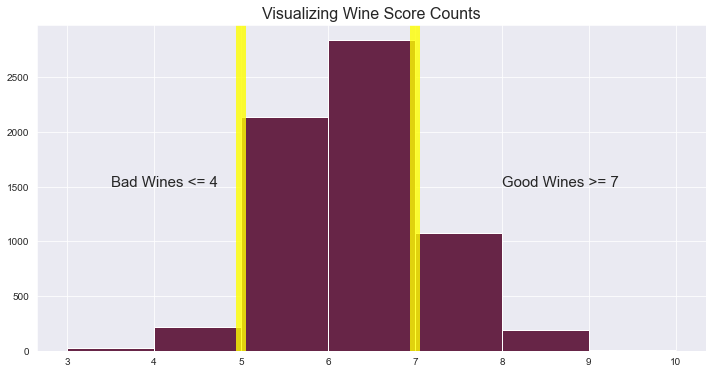

In [23]:
plt.hist(df.quality, bins = (3,4,5,6,7,8,9,10))
plt.title('Visualizing Wine Score Counts', fontsize = 16)
plt.axvline(x = 5, c = 'yellow', lw = 10, alpha = .8)
plt.axvline(x = 7, c = 'yellow', lw = 10, alpha = .8)
plt.annotate('Good Wines >= 7', (8, 1500), fontsize = 15)
plt.annotate('Bad Wines <= 4', (3.5,1500), fontsize = 15)
plt.show()

In [24]:
df['is_bad'] = (df.quality <=4).astype(int)

In [25]:
df['is_good'] = (df.quality  >= 7).astype(int)

In [26]:
def the_good_and_the_bad(df):
    '''
    This function takes in the wine dataframe and adds 2 columns
    is_good and is_bad. Returns the df
    '''
    df['is_bad'] = (df.quality <=4).astype(int) # all wines that are 4 or lower are 'bad'
    df['is_good'] = (df.quality  >= 7).astype(int) # all wines that are 7 or higher are 'good'
    
    return df

In [27]:
df = p.the_good_and_the_bad(df)

In [28]:
def quality_bin_maker(df):
    '''
    This function creates one column with the quality split into bad, average and good
    Quality binned
    0 == bad
    1 == average
    2 == good
    Returns dataframe with quality_bins returned
    '''
    df['quality_bins'] = pd.cut(df.quality,bins = (0,4,6,10), labels=[0,1,2])
    
    return df

In [29]:
df = p.quality_bin_maker(df)

## Split
- Train Validate Test split Breakdown
    - 80% - 20% Train/Validate and Test split
    - 70% - 30% Train and Validate Split (from the 80 above)


In [30]:
train, validate, test = p.banana_split(df)

train --> (3637, 17)
validate --> (1560, 17)
test --> (1300, 17)


In [31]:
target = 'quality'

targets = ['quality', 'quality_bins', 'is_good', 'is_bad', 'quality_bins_str']

variables = list(train.drop(columns = targets))

In [32]:
target, variables

('quality',
 ['fixed_acidity',
  'volatile_acidity',
  'citric_acid',
  'residual_sugar',
  'chlorides',
  'free_sulfur_dioxide',
  'total_sulfur_dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'is_white'])

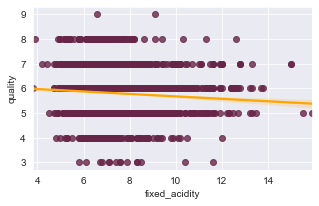

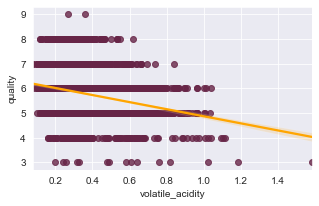

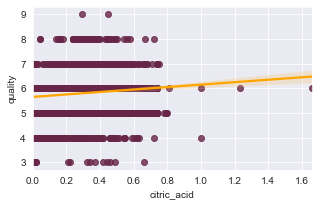

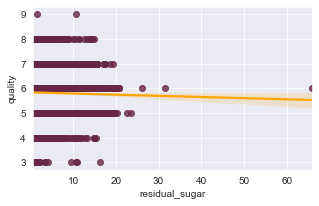

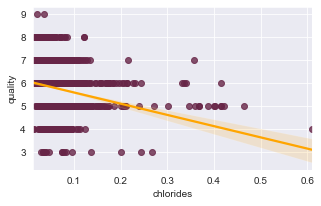

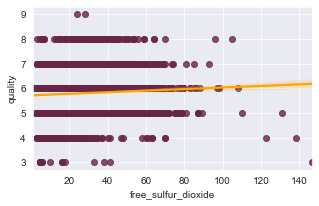

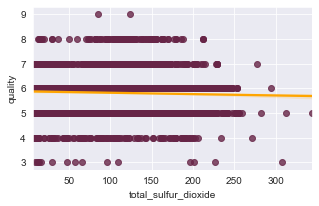

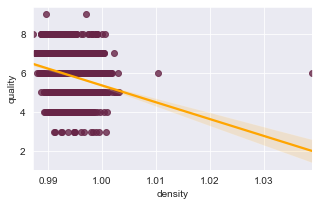

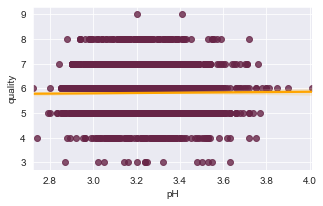

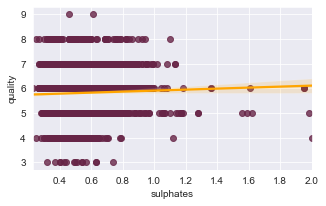

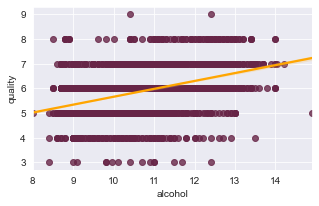

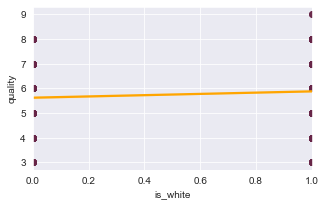

In [33]:
ex.plot_against_target(train, target, variables, figsize=(5,3))

In [34]:
df.alcohol.dtypes != 'O'

True

In [35]:
def plot_box_against_target(df, target, var_list, figsize = (10,5), hue = None):
    '''
    This function takes in a dataframe, target name, and Var List
    Will loop through variables (makes sure it's not an Object)
    And plot them
    '''
    
    for var in var_list:
        
        if df[var].dtypes != 'O':
            # create box plot
            plt.figure(figsize = figsize)
            sns.boxplot(data = df, x = target, y = var, palette=wine_palette2)
            plt.title(f'{var} and {target}')
            
            mean = round(df[var].mean(),2)
            plt.axhline(mean, c = 'yellow', lw = 4, alpha = .8)
            plt.show()
            
            print(f'Overall mean for {var} is: {mean}')
            print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')


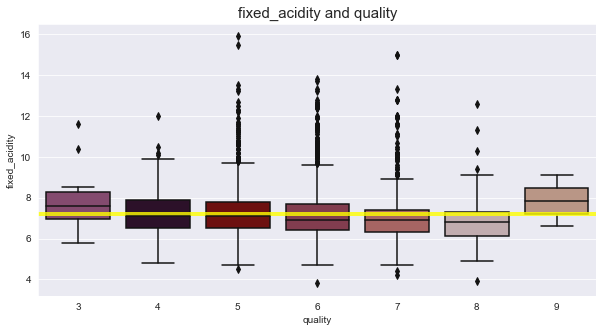

Overall mean for fixed_acidity is: 7.21
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



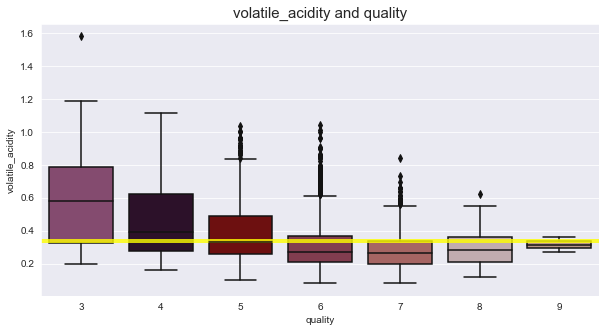

Overall mean for volatile_acidity is: 0.34
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



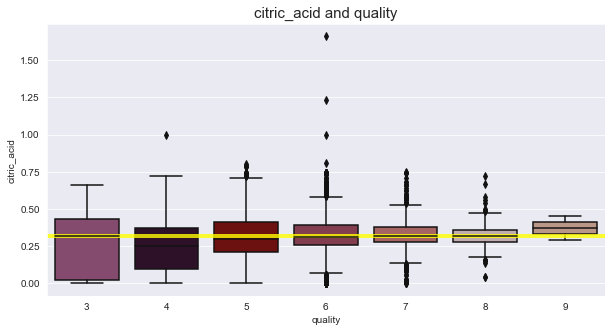

Overall mean for citric_acid is: 0.32
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



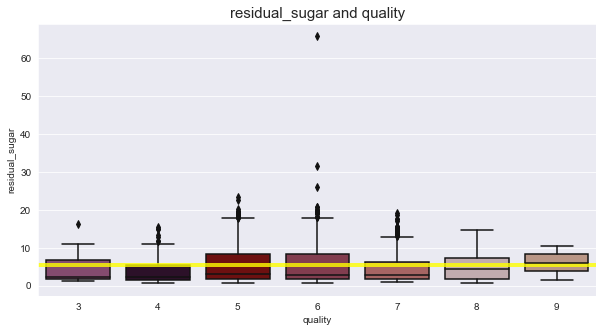

Overall mean for residual_sugar is: 5.39
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



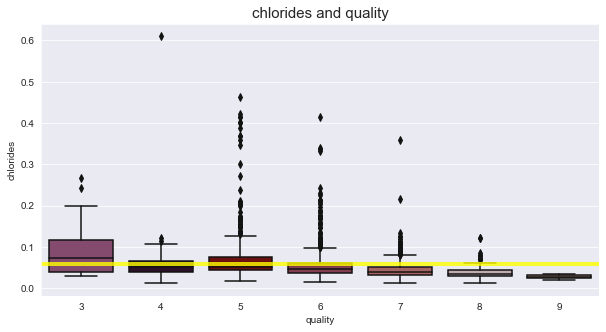

Overall mean for chlorides is: 0.06
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



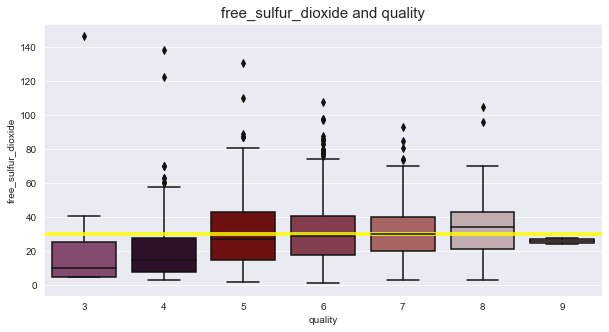

Overall mean for free_sulfur_dioxide is: 30.24
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



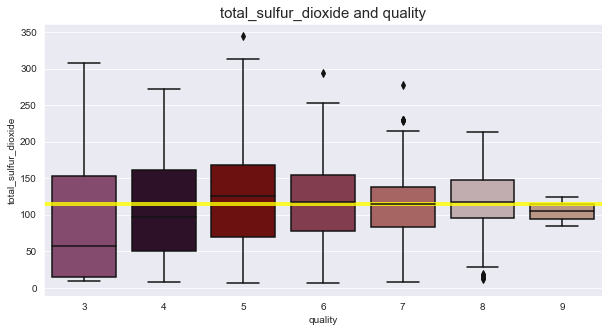

Overall mean for total_sulfur_dioxide is: 115.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



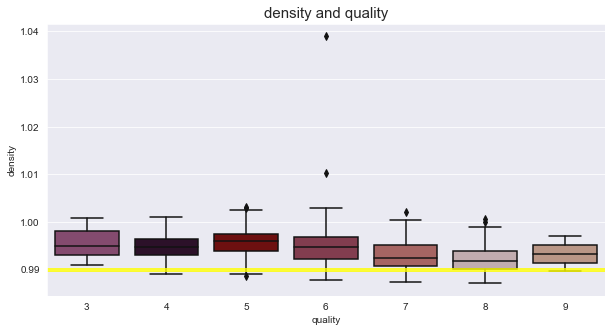

Overall mean for density is: 0.99
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



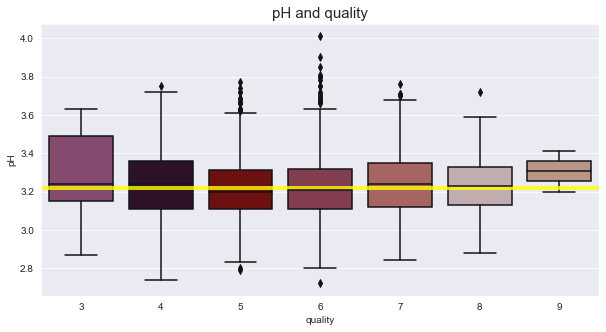

Overall mean for pH is: 3.22
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



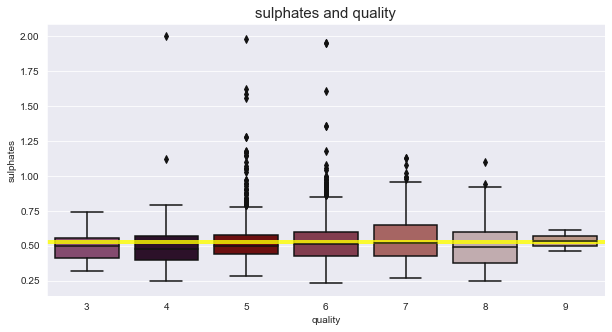

Overall mean for sulphates is: 0.53
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



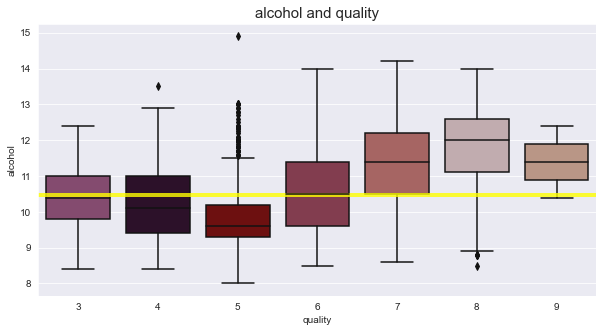

Overall mean for alcohol is: 10.48
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



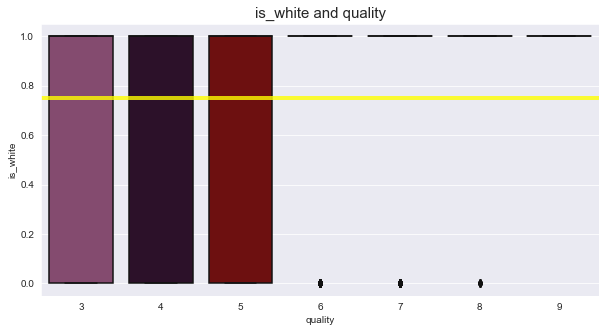

Overall mean for is_white is: 0.75
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



In [36]:
plot_box_against_target(train, target, variables)

### Takeaways Box Plots
- volatility acidity average for lowest rated wines, is much higher than the average
- Average sulfur dioxide content for lowest rated wines is much lower than the overall mean
- citric acid mean for highest rated wines is higher than overall mean (only category to do so)
- rating 7, 8, and 9 have higher mean for alcohol content is well above the mean for the whole group
- Maybe need to divide into three groups, bad, good, best


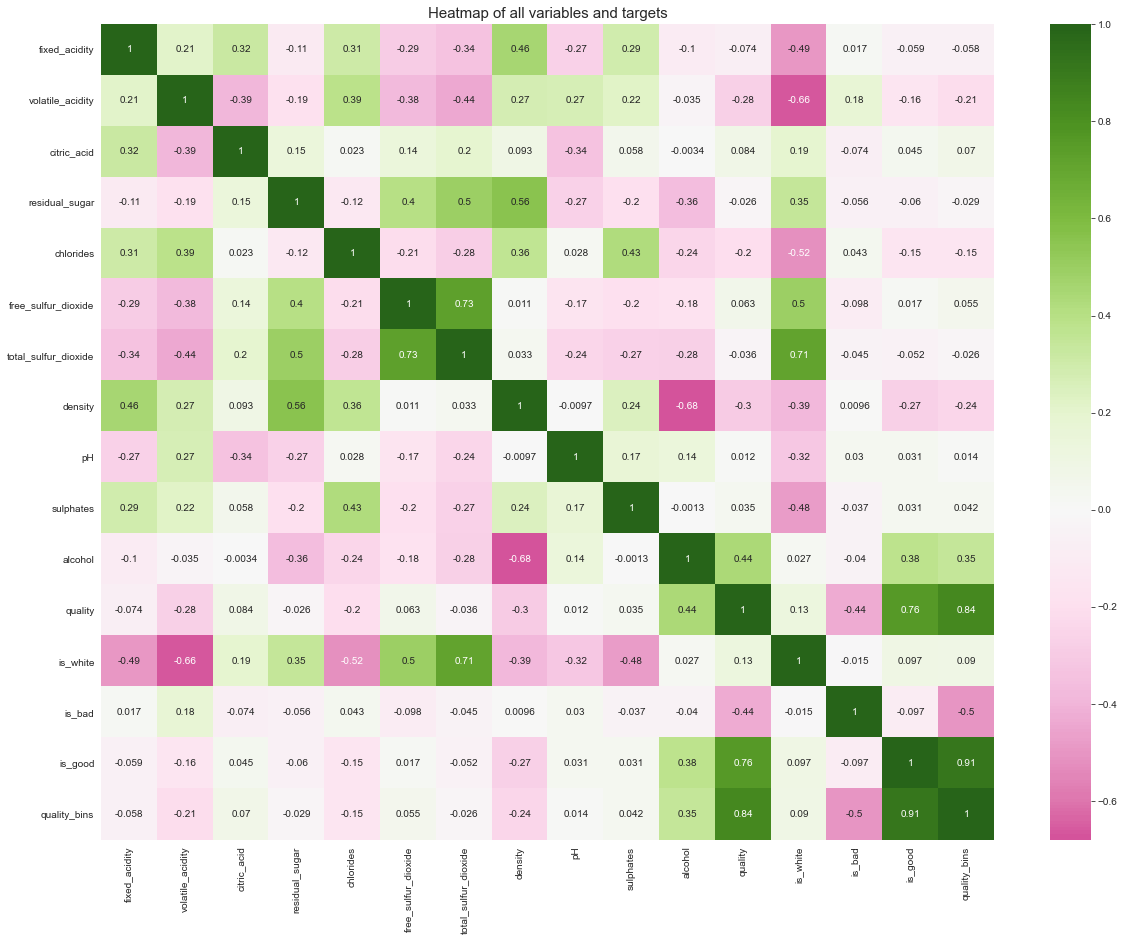

In [37]:
plt.figure(figsize = (20, 15))
sns.heatmap(train.corr(), annot = True, cmap = 'PiYG', center = 0)
plt.title('Heatmap of all variables and targets')
plt.show()

In [38]:
def get_heatmap(df, target):
    '''
    This method will return a heatmap of all variables and there relation to target, use on train dataset.
    '''
    plt.figure(figsize=(14,12))
    heatmap = sns.heatmap(df.corr()[[target]].sort_values(by=target, ascending=False), annot=True, linewidth=0.5,fmt = '.0%',cmap = 'PiYG', center = 0, annot_kws={"size": 13})
    heatmap.set_title('Feautures Correlating with {}'.format(target))

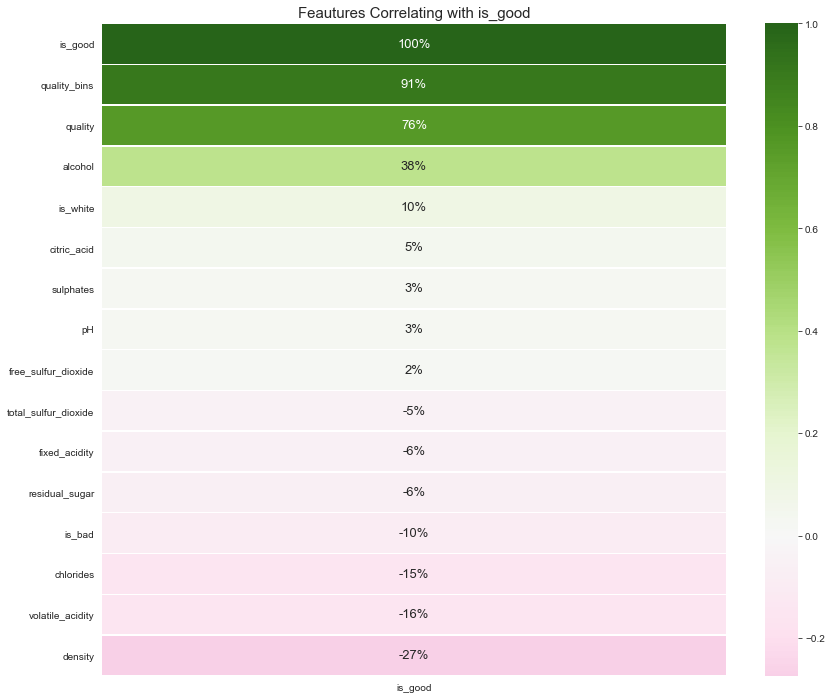

In [39]:
get_heatmap(train, 'is_good')

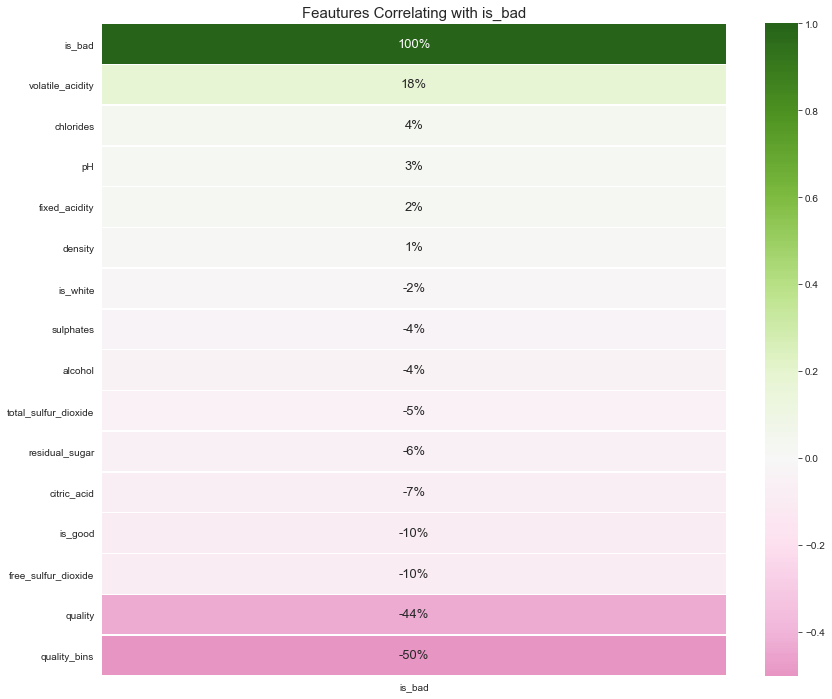

In [40]:
get_heatmap(train, 'is_bad')

<hr style="border-top: 10px groove #7c0000; margin-top: 1px; margin-bottom: 1px"></hr>

## Statistical Testing
- Questions to ask
    - Do alcohol content and wine score have a linear relationship? (continuous vs continuous Pearson R)
    - Similar, is the mean alcohol content for best wines (7-9) higher than the population alcohol content mean (continuous vs categorical one_samp one-tailed, t-test)
    - Does Free Sulfur dioxide level have a linear relationship with quality? (continuous vs continuous Pearson R)
    - Is citric acid level higher in good wines
    - Is citric acid level lower in bad wines
    - Is volatile acidity higher in bad wines

### Is Alcohol Content higher in Good Wines

${H_0}$ Mean alcohol content for good wines (scores 7-9) == to mean alcohol content for all wines

${H_a}$ Mean alcohol content for for all wines > mean alcohol content for all wines

Test: One Sample, one tailed, T-Test 

alpha = 0.05

In [41]:
t, p = stats.ttest_1samp(train[train.is_good == 1].alcohol, train.alcohol.mean())

# divide p by two because 1 tailed
p = p / 2 

In [42]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is positive so the sample is greater than the population mean


------
### Sulfur Dioxide and Bad Wines

${H_0}$: Free sulfur dioxide level has a linear relationship with wine quality

${H_a}$: Free sulfur dioxide level does not have a linear relationship with wine quality

Test: Pearson R

alpha = 0.05

In [43]:
r, p = stats.pearsonr(train.free_sulfur_dioxide, train.quality)

In [44]:
ex.eval_stats_test(p)

We can reject our null hypothesis


 
${H_0}$: The Mean Free sulfur dioxide level of bad wines == the mean free sulfur dioxide level of all wines

${H_a}$ The Mean Free sulfur dioxide level of bad wines < the mean free sulfur dioxide level of all wines

Test: One Sample, one tailed, T Test

alpha = 0.05

In [45]:
t, p = stats.ttest_1samp(train[train.is_bad ==1].free_sulfur_dioxide, train.free_sulfur_dioxide.mean())

# divide p by 2 because 1 tailed
p = p/2

In [46]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is negative so the sample is less than the population mean


------- 
### Are Citric Acid Levels higher in Good Wines
${H_0}$: The citric acid level of good wines == the mean citric level of all wines

${H_a}$ The citric level of good wines > the mean citric acid level of all wines

Test: One Sample, one tailed, T Test

alpha = 0.05

In [47]:
t, p = stats.ttest_1samp(train[train.is_good == 1].citric_acid, train.citric_acid.mean())
p = p/2

In [48]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is positive so the sample is greater than the population mean


------- 
### Are Citric Acid Levels lower in Bad Wines
${H_0}$: The citric acid level of bad wines == the mean citric level of all wines

${H_a}$ The citric level of bad wines < the mean citric acid level of all wines

Test: One Sample, one tailed, T Test

alpha = 0.05

In [49]:
t, p = stats.ttest_1samp(train[train.is_bad == 1].citric_acid, train.citric_acid.mean())
p = p/2

In [50]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is negative so the sample is less than the population mean


-----
### Is Volatile Acidity higher in Bad Wines

${H_0}$: Mean Volatile Acidity level in bad wines == mean volatile acidity level in all wines

${H_a}$: Mean Volatile Acidity level in bad wines > mean volatile acidity level in all wines

Test: One sample, one tailed, T Test

alpha = 0.05

In [51]:
t, p = stats.ttest_1samp(train[train.is_bad == 1].volatile_acidity, train.volatile_acidity.mean())
p = p/2

In [52]:
ex.eval_ttest_1samp(t, p)

We can reject our null hypothesis
The T is positive so the sample is greater than the population mean


<hr style="border-top: 10px groove #7c0000; margin-top: 1px; margin-bottom: 1px"></hr>

## Modeling

Goals for modeling will be to create models that can accurately predict if a wine is good or bad (using the features already engineered). The target for my model will be `quality_bins`. 0 is bad wines, 1 is average, and 3 is good wines. I am going to optimize for accuracy, with precision as a secondary. This is because I would like to minimize the amount of false positives (precision = TP / TP + FP, the closer to 1 the better).

#### Why would this be important? 
A wine maker could use this model to predict whether or not his wine will get a good or a bad rating. He simply performs the phisicochemical tests on the wine, runs the data through the model, and could check to see if this batch of wine will be bad, average, or good.

### Modeling Goals
- Establish baseline
- Feature Selection 
- Create Models (Maybe use KNN on second round will need to scale data)
- Choose best Model

### Hurdles
- Data is imbalanced
- Will need to find a way to balance it

### Baseline
- Set to most predicted (I know this is average wines)

In [53]:
train.quality_bins.value_counts().nlargest(1)

1    2796
Name: quality_bins, dtype: int64

In [54]:
# set up predictions df
pred_df = pd.DataFrame(columns=['baseline'], index=train.index)

# set baseline prediction to 1
pred_df['baseline'] = 1

In [55]:
target_names = ['bad_wines', 'avg_wines', 'good_wines']

In [56]:
print(classification_report(train.quality_bins, pred_df.baseline, target_names = target_names))

              precision    recall  f1-score   support

   bad_wines       0.00      0.00      0.00       136
   avg_wines       0.77      1.00      0.87      2796
  good_wines       0.00      0.00      0.00       705

    accuracy                           0.77      3637
   macro avg       0.26      0.33      0.29      3637
weighted avg       0.59      0.77      0.67      3637



In [57]:
var_cols = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol', 'is_white']

target = 'quality_bins_str'

In [58]:
# use 5 best columns
m.select_kbest(train[var_cols], train[target], 5)

['volatile_acidity', 'chlorides', 'free_sulfur_dioxide', 'density', 'alcohol']

In [59]:
X_cols = m.select_kbest(train[var_cols], train[target], 5)

In [60]:
X_train, y_train, X_validate, y_validate, X_test, y_test = m.all_aboard_the_X_train(X_cols, target, train, validate, test)

In [61]:
# Data set is imbalanced. Use SMOTE to balance out dataset and get more of the lower classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 123)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [62]:
# set up models to try and put them in a list
d_tree = DecisionTreeClassifier()

knn = KNeighborsClassifier()

log = LogisticRegression()

r_forest = RandomForestClassifier()

models = [d_tree, knn, log, r_forest]

In [63]:
def print_metrics(model, y, pred, set_name = 'This Set'):
    
    cm = pd.DataFrame(confusion_matrix(y, pred))
    
    print(model)
    print(f"~~~~~{set_name} Scores~~~~~~")
    print(classification_report(y, pred))
    print(cm)
    print()

In [64]:
r_forest.fit(X_train_smote, y_train_smote)

#predict for train and validate
train_pred = r_forest.predict(X_train_smote)
val_pred = r_forest.predict(X_validate)

#see metrics for train
m.print_metrics(r_forest, y_train_smote, train_pred, set_name="Train")

RandomForestClassifier()
~~~~~Train Scores~~~~~~
              precision    recall  f1-score   support

    avg_wine       1.00      1.00      1.00      2796
    bad_wine       1.00      1.00      1.00      2796
   good_wine       1.00      1.00      1.00      2796

    accuracy                           1.00      8388
   macro avg       1.00      1.00      1.00      8388
weighted avg       1.00      1.00      1.00      8388

[[2796    0    0]
 [   0 2796    0]
 [   0    0 2796]]



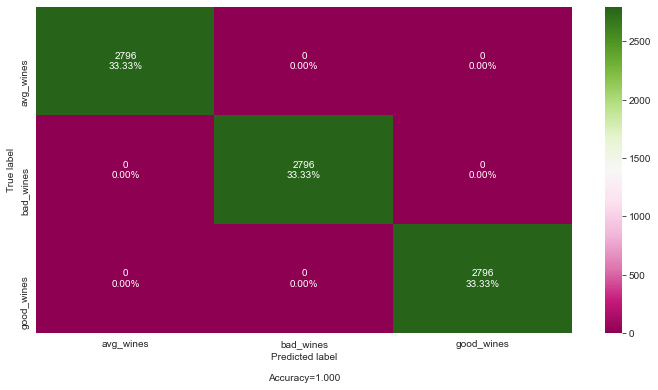

In [66]:
cf_matrix = confusion_matrix(y_train_smote, train_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['avg_wines', 'bad_wines', 'good_wines']
m.make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='PiYG')

DecisionTreeClassifier()


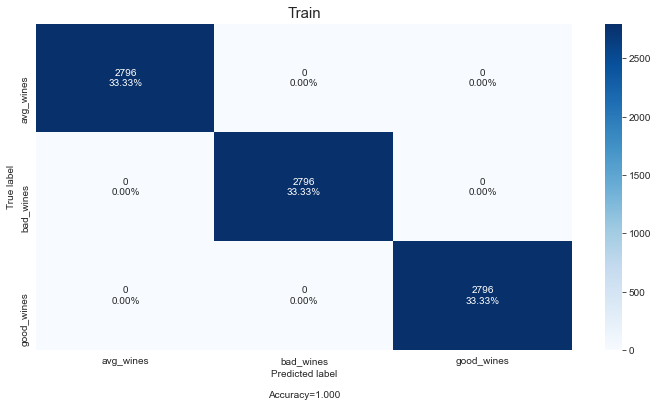

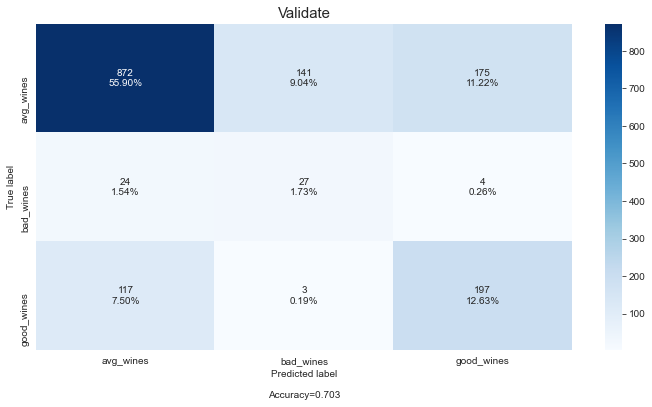


KNeighborsClassifier()


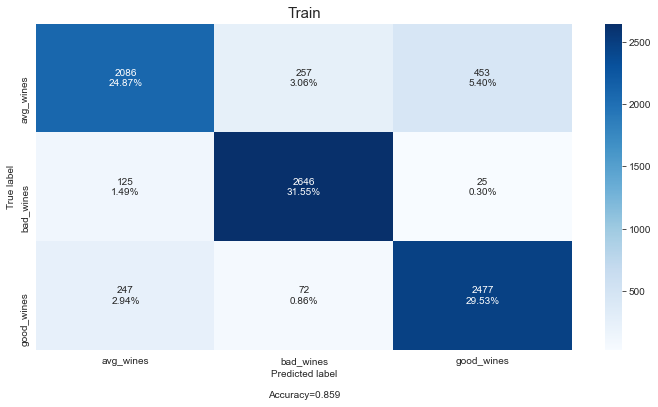

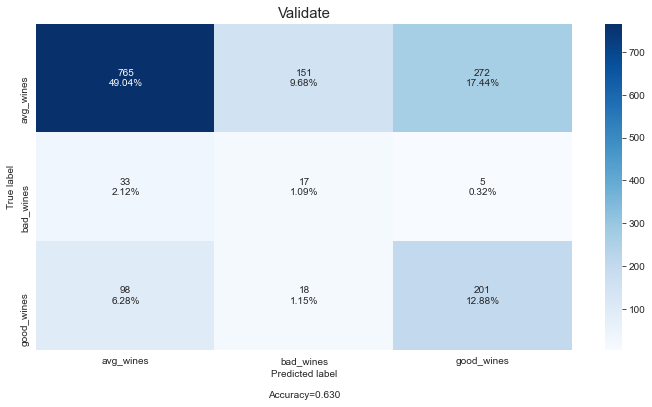


LogisticRegression()


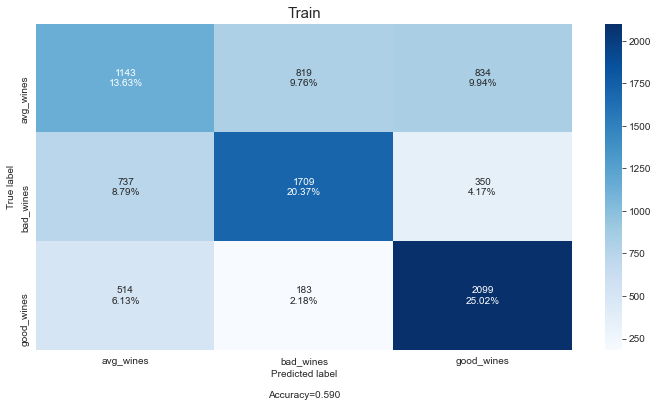

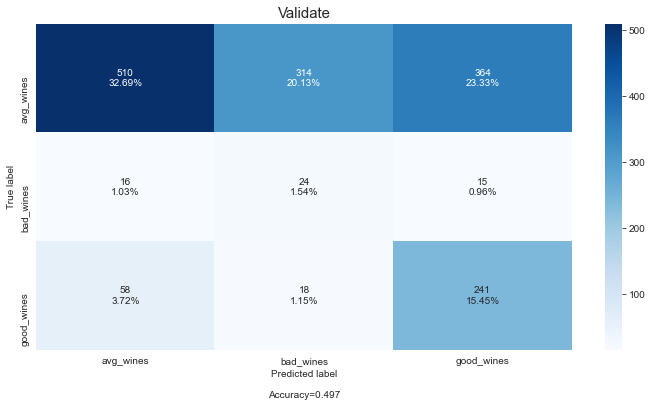


RandomForestClassifier()


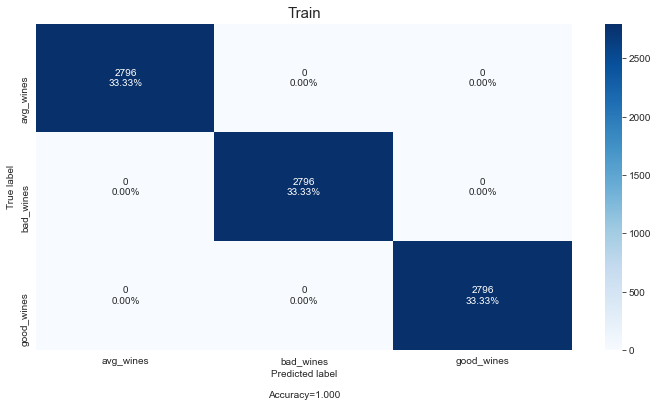

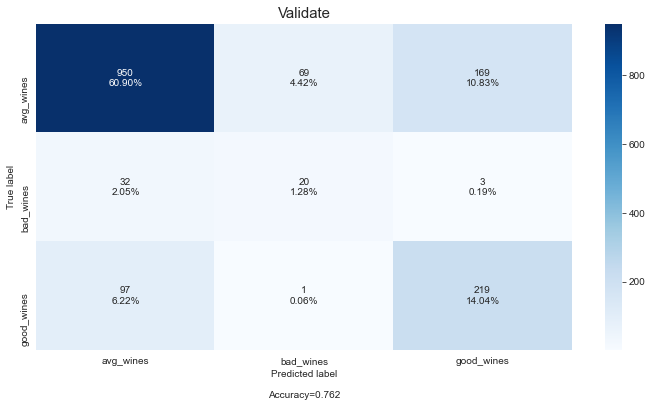

In [73]:
# loop through all the model types and print out metrics
for model in models:
    # fit to train dataset
    model.fit(X_train_smote, y_train_smote)
    
    #predict for train and validate
    train_pred = model.predict(X_train_smote)
    val_pred = model.predict(X_validate)
    
    cf_matrix = confusion_matrix(y_train_smote, train_pred)
    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['avg_wines', 'bad_wines', 'good_wines']
    print(model)
    m.make_confusion_matrix(cf_matrix, 
                          group_names=labels,
                          categories=categories, 
                          cmap='Blues',
                           title='Train')
    plt.show()
    cf_matrix_val = confusion_matrix(y_validate, val_pred)
    m.make_confusion_matrix(cf_matrix_val, 
                            group_names=labels,
                            categories=categories, 
                            cmap='Blues',
                            title='Validate')
    plt.show()
    print()

In [72]:
# loop through all the model types and print out metrics
for model in models:
    # fit to train dataset
    model.fit(X_train_smote, y_train_smote)

    #predict for train and validate
    train_pred = model.predict(X_train_smote)
    val_pred = model.predict(X_validate)
    
    #see metrics for train
    m.print_metrics(model, y_train_smote, train_pred, set_name="Train")
    #print metrics for validate
    m.print_metrics(model, y_validate, val_pred, set_name='Validate')
    print('---------------------------------------------------------')

DecisionTreeClassifier()
~~~~~Train Scores~~~~~~
              precision    recall  f1-score   support

    avg_wine       1.00      1.00      1.00      2796
    bad_wine       1.00      1.00      1.00      2796
   good_wine       1.00      1.00      1.00      2796

    accuracy                           1.00      8388
   macro avg       1.00      1.00      1.00      8388
weighted avg       1.00      1.00      1.00      8388

[[2796    0    0]
 [   0 2796    0]
 [   0    0 2796]]

DecisionTreeClassifier()
~~~~~Validate Scores~~~~~~
              precision    recall  f1-score   support

    avg_wine       0.86      0.73      0.79      1188
    bad_wine       0.16      0.47      0.24        55
   good_wine       0.51      0.62      0.56       317

    accuracy                           0.70      1560
   macro avg       0.51      0.61      0.53      1560
weighted avg       0.76      0.70      0.72      1560

[[869 132 187]
 [ 27  26   2]
 [115   5 197]]

----------------------------------

### Takeaways Test on Random Forest
- Random Forest classifier had an .82 accuracy which beat the baseline of .77
- Precision on each class was fairly good which is better
- Much higher precision than the baseline for each of the classes (baseline was only predicting the average class)

In [75]:
var_cols = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol', 'is_white']

target = 'quality_bins_str'

In [69]:
m.select_kbest(train[var_cols], train[target], 5)

['volatile_acidity', 'chlorides', 'free_sulfur_dioxide', 'density', 'alcohol']

In [70]:
X_cols = m.select_kbest(train[var_cols], train[target], 5)

In [71]:
X_train, y_train, X_validate, y_validate, X_test, y_test = m.all_aboard_the_X_train(X_cols, target, train, validate, test)

In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 123)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [73]:
var_cols = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol', 'is_white']

target = 'is_good'

In [74]:
def get_confusion_matrix(y_df, pred):
    
    #conf Matrix
    conf = confusion_matrix(y_df, pred)
    mat =  pd.DataFrame ((confusion_matrix(y_df, pred )),index = ['actual_negative','actual_positive'], columns =['pred_negative','pred_positive' ])
    rubric_df = pd.DataFrame([['True Negative', 'False positive'], ['False Negative', 'True Positive']], columns=mat.columns, index=mat.index)
    cf = rubric_df + ': ' + mat.values.astype(str)
    
    return cf

### Random Forest Takeawyas 
- This one doesn't work at all 
- very bad

## Conclusion

The logistic regression model performed the best with a accuracy score of .77 
guessed the positive class not aiosdfwinces with a rate of 65 time 








Did not run on test set because this will actually not help my prject at all 